In [211]:
import pandas as pd

In [212]:
# Dictionary für Monatsabkürzungen
month_dict = {
    '1': 'Jan',
    '2': 'Feb',
    '3': 'Mar',
    '4': 'Apr',
    '5': 'May',
    '6': 'Jun',
    '7': 'Jul',
    '8': 'Aug',
    '9': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

In [213]:
################################################   Covid excel  ################################################################

In [214]:
path = 'C:/Users/Rike/Documents/git/table_covid_clean_t.xlsx'
df_covid = pd.read_excel(path)
df_covid

,country/region,2020-01-22,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,...,2022-12-01,2023-01-01,2023-02-01 00:00:00,2023-03-01,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
0,Germany,0,8,117,67366,160758,181815,194725,209653,243599,...,36499600,37369867,38168908,38189954,38202571,38210850,38210851,38231610,38241231,38249060
1,US,1,8,32,227903,1115972,1809384,2698127,4605921,6088458,...,98903928,100769628,103443455,103533872,103650837,103646975,103655539,103690910,103755771,103802702
2,increase_total_ger,0,8,109,67249,93392,21057,12910,14928,33946,...,879913,870267,799041,820087,33663,20896,8280,20760,30380,17450
3,increase_total_us,0,7,24,227871,888069,693412,888743,1907794,1482537,...,1363192,1865700,2673827,2764244,207382,113103,4702,43935,100232,111792


In [215]:
df_covid.columns = ['Country/Region'] + [pd.to_datetime(col) if not isinstance(col, pd.Timestamp) else col for col in df_covid.columns[1:]]
df_covid.columns = ['Country/Region'] + [col.strftime('%m/%Y') if isinstance(col, pd.Timestamp) else col for col in df_covid.columns[1:]]
df_covid

,Country/Region,01/2020,02/2020,03/2020,04/2020,05/2020,06/2020,07/2020,08/2020,09/2020,...,12/2022,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023,08/2023,09/2023
0,Germany,0,8,117,67366,160758,181815,194725,209653,243599,...,36499600,37369867,38168908,38189954,38202571,38210850,38210851,38231610,38241231,38249060
1,US,1,8,32,227903,1115972,1809384,2698127,4605921,6088458,...,98903928,100769628,103443455,103533872,103650837,103646975,103655539,103690910,103755771,103802702
2,increase_total_ger,0,8,109,67249,93392,21057,12910,14928,33946,...,879913,870267,799041,820087,33663,20896,8280,20760,30380,17450
3,increase_total_us,0,7,24,227871,888069,693412,888743,1907794,1482537,...,1363192,1865700,2673827,2764244,207382,113103,4702,43935,100232,111792


In [216]:
new_columns1 = []

# Iteriere über die Spaltennamen ab der zweiten Spalte
for col in df_covid.columns[1:]:
    month, year = col.split('/')  # Spaltennamen aufteilen
    month_name = month_dict[str(int(month))]  # Monat durch Abkürzung ersetzen
    new_columns1.append(f"{month_name} {year}")  # Neuer Spaltenname z.B. 'Jan 2018'

# Setzen der neuen Spaltennamen inkl. 'Country/Region'
df_covid.columns = ['Country/Region'] + new_columns1

In [217]:
print("\nDataFrame nach Umbenennung der Spalten mit Monatsabkürzungen:\n")
df_covid


DataFrame nach Umbenennung der Spalten mit Monatsabkürzungen:



,Country/Region,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,...,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023
0,Germany,0,8,117,67366,160758,181815,194725,209653,243599,...,36499600,37369867,38168908,38189954,38202571,38210850,38210851,38231610,38241231,38249060
1,US,1,8,32,227903,1115972,1809384,2698127,4605921,6088458,...,98903928,100769628,103443455,103533872,103650837,103646975,103655539,103690910,103755771,103802702
2,increase_total_ger,0,8,109,67249,93392,21057,12910,14928,33946,...,879913,870267,799041,820087,33663,20896,8280,20760,30380,17450
3,increase_total_us,0,7,24,227871,888069,693412,888743,1907794,1482537,...,1363192,1865700,2673827,2764244,207382,113103,4702,43935,100232,111792


In [218]:
df_covid['Country/Region'][2] = "increase_monthly_ger"
df_covid['Country/Region'][3] = "increase_monthly_usa"
df_covid

C:\Users\Rike\AppData\Local\Temp\ipykernel_10392\894900690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['Country/Region'][2] = "increase_monthly_ger"
C:\Users\Rike\AppData\Local\Temp\ipykernel_10392\894900690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['Country/Region'][3] = "increase_monthly_usa"


,Country/Region,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,...,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023
0,Germany,0,8,117,67366,160758,181815,194725,209653,243599,...,36499600,37369867,38168908,38189954,38202571,38210850,38210851,38231610,38241231,38249060
1,US,1,8,32,227903,1115972,1809384,2698127,4605921,6088458,...,98903928,100769628,103443455,103533872,103650837,103646975,103655539,103690910,103755771,103802702
2,increase_monthly_ger,0,8,109,67249,93392,21057,12910,14928,33946,...,879913,870267,799041,820087,33663,20896,8280,20760,30380,17450
3,increase_monthly_usa,0,7,24,227871,888069,693412,888743,1907794,1482537,...,1363192,1865700,2673827,2764244,207382,113103,4702,43935,100232,111792


In [219]:
df_filtered_covid = df_covid.dropna(axis = 1)
df_filtered_covid

,Country/Region,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,...,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023
0,Germany,0,8,117,67366,160758,181815,194725,209653,243599,...,36499600,37369867,38168908,38189954,38202571,38210850,38210851,38231610,38241231,38249060
1,US,1,8,32,227903,1115972,1809384,2698127,4605921,6088458,...,98903928,100769628,103443455,103533872,103650837,103646975,103655539,103690910,103755771,103802702
2,increase_monthly_ger,0,8,109,67249,93392,21057,12910,14928,33946,...,879913,870267,799041,820087,33663,20896,8280,20760,30380,17450
3,increase_monthly_usa,0,7,24,227871,888069,693412,888743,1907794,1482537,...,1363192,1865700,2673827,2764244,207382,113103,4702,43935,100232,111792


In [220]:
df_filtered_covid['Country/Region'].unique()

array(['Germany', 'US', 'increase_monthly_ger', 'increase_monthly_usa'],
      dtype=object)

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
columns_to_drop = df_covid.columns[1:16]  # Spalten von B bis E (2. bis 6. Spalte)
df_graph = df_covid.drop(columns=columns_to_drop)
df_graph

,Country/Region,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,...,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023
0,Germany,2833173,3400532,3682911,3729033,3766765,3956387,4237619,4607208,5903999,...,36499600,37369867,38168908,38189954,38202571,38210850,38210851,38231610,38241231,38249060
1,US,30656330,32516226,33407540,33797251,35152818,39585475,43694428,46163201,48743340,...,98903928,100769628,103443455,103533872,103650837,103646975,103655539,103690910,103755771,103802702
2,increase_monthly_ger,386105,567359,282379,46122,37732,189622,281232,369589,1296791,...,879913,870267,799041,820087,33663,20896,8280,20760,30380,17450
3,increase_monthly_usa,1841910,1859896,891314,389711,1355567,4432657,4108953,2468773,2580139,...,1363192,1865700,2673827,2764244,207382,113103,4702,43935,100232,111792


In [223]:
covid_counts = df_graph.melt(id_vars=['Country/Region'], 
                                  var_name='Month', 
                                  value_name='Count')

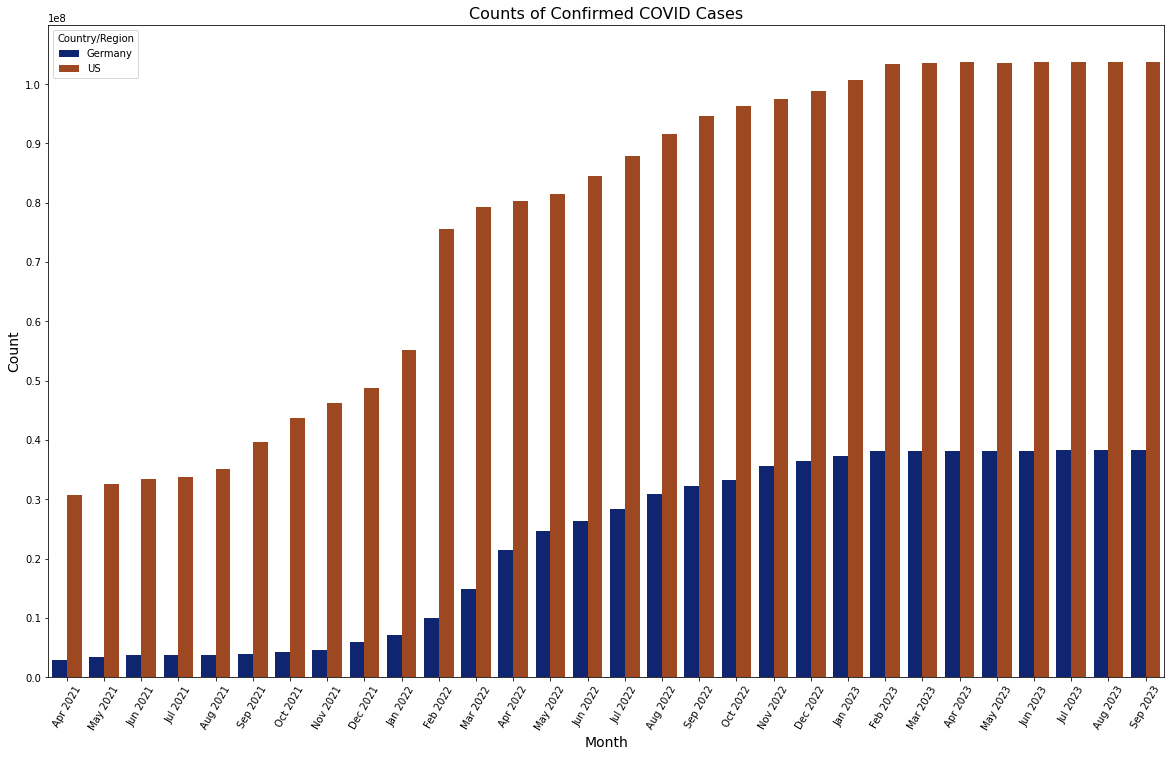

In [224]:
filtered_covid_counts = covid_counts[covid_counts['Country/Region'].isin(['Germany', 'US'])]


# Plot
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='Count', hue='Country/Region', data=filtered_covid_counts, palette='dark')
plt.legend(fontsize=14)

plt.ylim(0, 110000000)  # Setzt die y-Achse von 0 bis 50

# Setzen von benutzerdefinierten y-Achsen-Ticks
plt.yticks([0, 10000000, 20000000, 30000000, 40000000,50000000,60000000,70000000,80000000,90000000, 100000000])

plt.title("Counts of Confirmed COVID Cases", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
ax.set_ylim(0,103533872 )
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
plt.legend(title='Country/Region')

plt.show()
#sns.color_palette "dark", "muted", "colorblind", "deep"

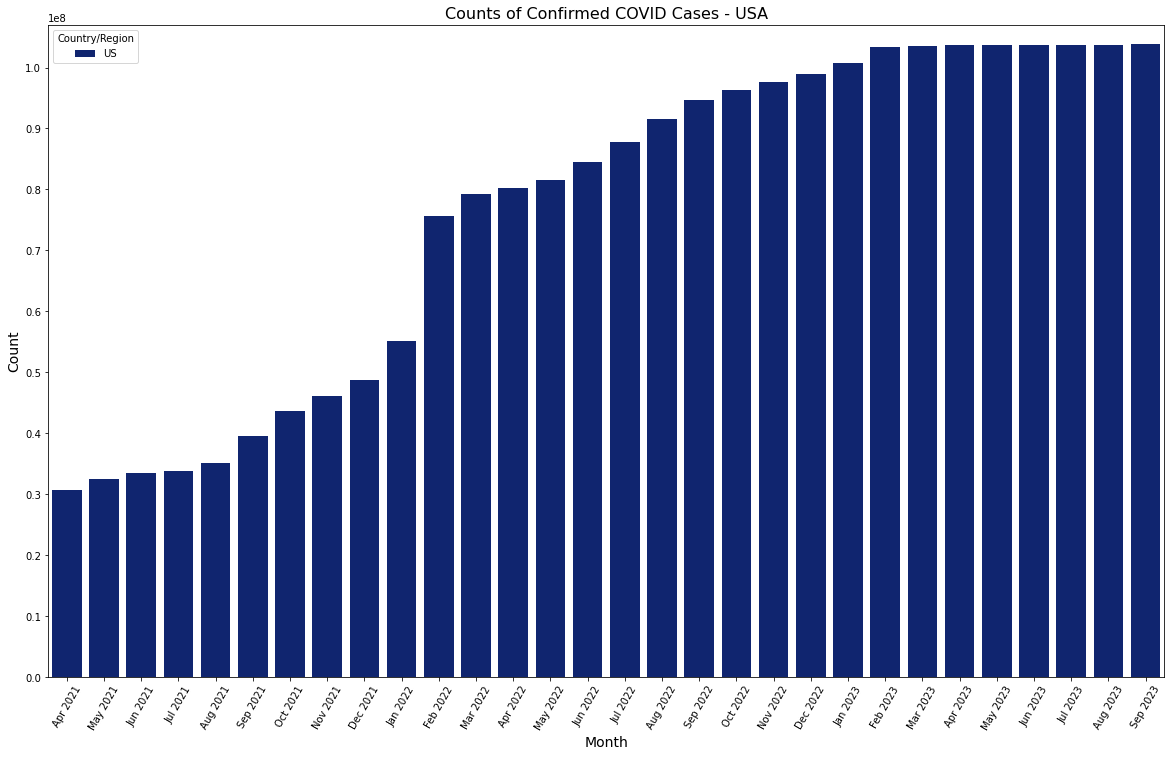

In [225]:
filtered_covid_counts2 = covid_counts[covid_counts['Country/Region'].isin(['US'])]


# Plot
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='Count', hue='Country/Region', data=filtered_covid_counts2, palette='dark')
plt.legend(fontsize=14)

plt.ylim(0, 107000000)  # Setzt die y-Achse von 0 bis 50

# Setzen von benutzerdefinierten y-Achsen-Ticks
plt.yticks([0, 10000000, 20000000, 30000000, 40000000,50000000,60000000,70000000,80000000,90000000, 100000000])

plt.title("Counts of Confirmed COVID Cases - USA", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
ax.set_ylim(0,103533872 )
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
plt.legend(title='Country/Region')

plt.show()
#sns.color_palette "dark", "muted", "colorblind", "deep"

In [226]:
increases = df_graph.melt(id_vars=['Country/Region'], 
                                  var_name='Month', 
                                  value_name='Increase')
filtered_increases = increases[increases['Country/Region'].isin(['increase_monthly_ger', 'increase_monthly_usa'])]

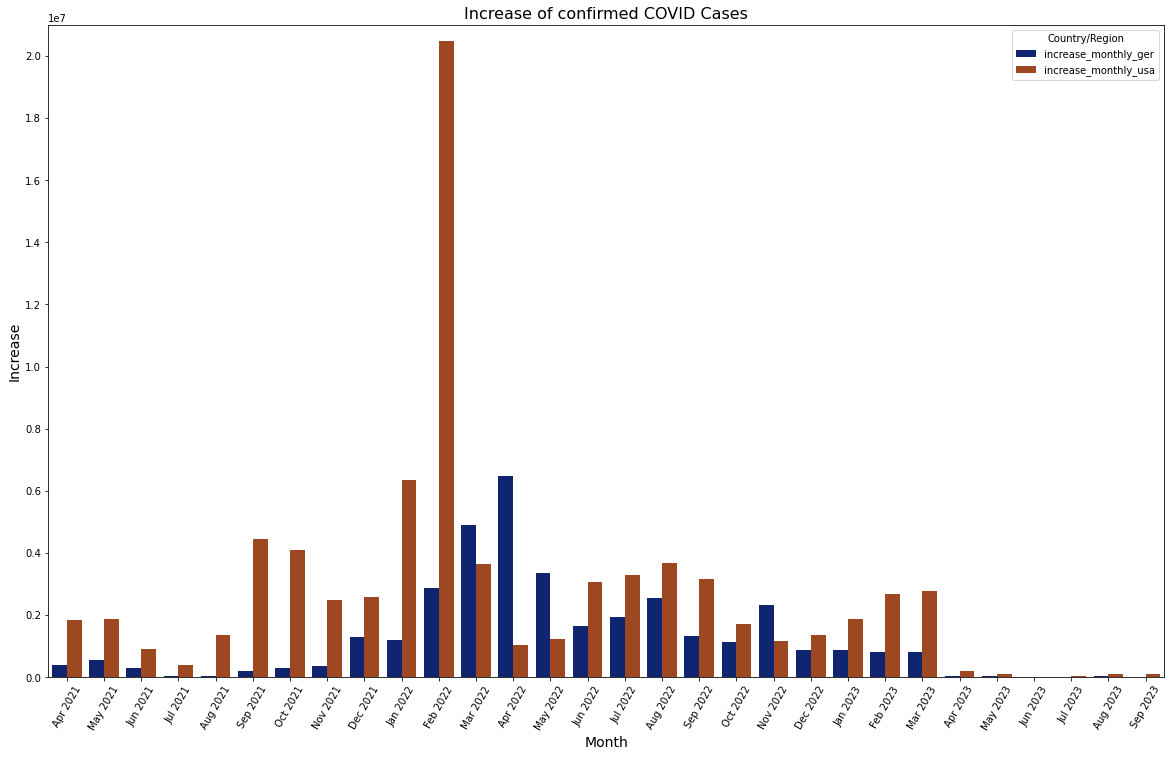

In [227]:

# Plot-Erstellung
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='Increase', hue='Country/Region', data=filtered_increases, palette='dark')

# Legende und Achsenanpassungen
plt.legend(fontsize=14)
plt.ylim(0, 21000000)  # y-Achse von 0 bis 110 Millionen

# Benutzerdefinierte y-Achsen-Ticks setzen
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000, 18000000, 20000000])

# Titel und Achsenbeschriftungen
plt.title("Increase of confirmed COVID Cases", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Increase", fontsize=14)

# x-Achse lesbarer machen
plt.xticks(rotation=60)  

# Legendenformatierung
plt.legend(title='Country/Region')

plt.show()


In [228]:
increases1 = df_graph.melt(id_vars=['Country/Region'], 
                                  var_name='Month', 
                                  value_name='Increase')
filtered_increases1 = increases1[increases1['Country/Region'].isin(['increase_monthly_usa'])]

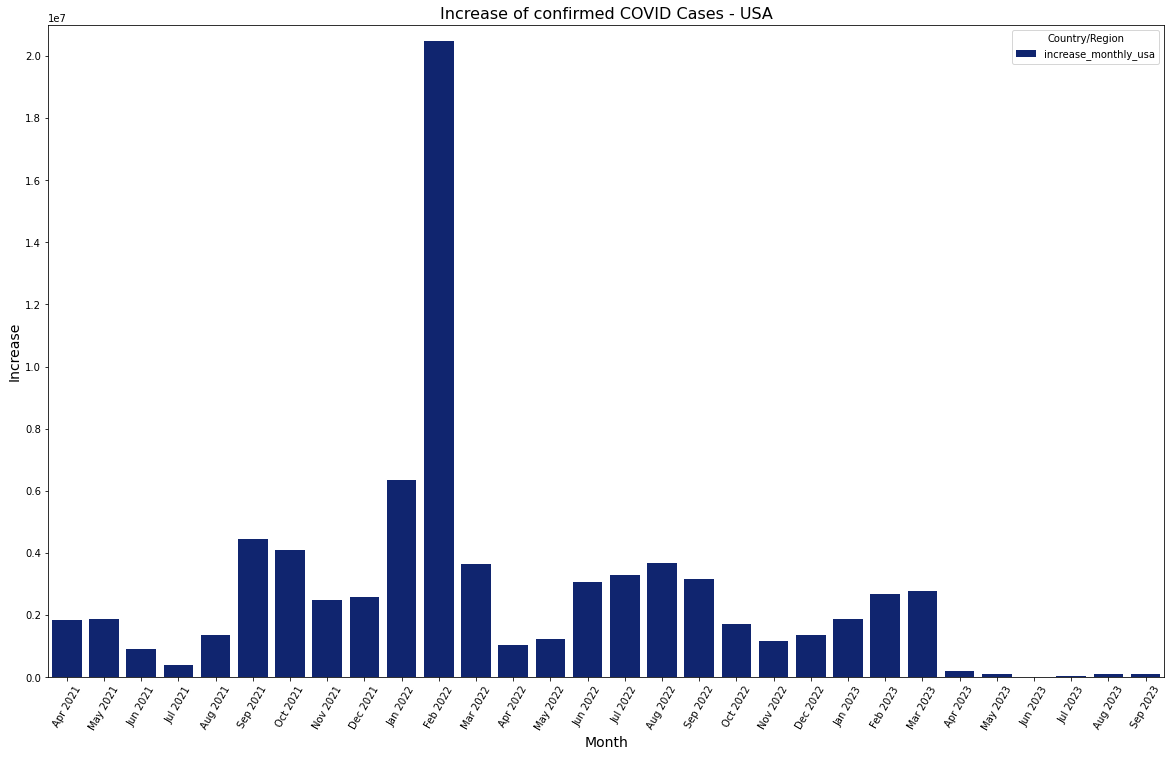

In [229]:
# Plot-Erstellung
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='Increase', hue='Country/Region', data=filtered_increases1, palette='dark')

# Legende und Achsenanpassungen
#plt.legend(fontsize=14)
plt.ylim(0, 21000000)  # y-Achse von 0 bis 110 Millionen

# Benutzerdefinierte y-Achsen-Ticks setzen
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000, 18000000, 20000000])

# Titel und Achsenbeschriftungen
plt.title("Increase of confirmed COVID Cases - USA", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Increase", fontsize=14)

# x-Achse lesbarer machen
plt.xticks(rotation=60)  

# Legendenformatierung
#plt.legend(title='Country/Region')

plt.show()

In [230]:
##################################### Summary_covid_videos  ###################################################################

In [231]:
path = 'C:/Users/Rike/Documents/git/pd_summary_covid.xlsx'
df_summary = pd.read_excel(path)
df_summary

,year_month,2018-05,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,...,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08
0,covid_title,1,1.00,6.000000,80.000,5.500000e+02,3.670000e+02,2.240000e+02,1.820000e+02,1.470000e+02,...,16.000000,27.000000,19.000000,22.000000,27.000000,32.000000,25.0000,48.000000,24.000000,48.0000
1,covid_view_count,7,1157.00,20349.000000,57883.000,4.100354e+06,1.595695e+06,2.478034e+06,3.225200e+06,1.608704e+06,...,20573.000000,27815.000000,29665.000000,43415.000000,37397.000000,33433.000000,245945.0000,153970.000000,24294.000000,48474.0000
2,covid_view_like_ratio,0,0.04,0.023333,0.051,3.714545e-02,3.697548e-02,3.808036e-02,3.725275e-02,4.054422e-02,...,0.045625,0.019259,0.044211,0.055455,0.034815,0.033438,0.0252,0.022292,0.032083,0.0525
3,covid_comment_count,0,5.00,6.000000,339.000,5.935000e+03,2.862000e+03,4.445000e+03,3.210000e+03,8.133000e+03,...,159.000000,222.000000,145.000000,524.000000,207.000000,114.000000,559.0000,1030.000000,207.000000,443.0000


In [232]:
df_summary.columns = ['Country/Region'] + [pd.to_datetime(col) if not isinstance(col, pd.Timestamp) else col for col in df_summary.columns[1:]]
df_summary.columns = ['Country/Region'] + [col.strftime('%m/%Y') if isinstance(col, pd.Timestamp) else col for col in df_summary.columns[1:]]
df_summary

,Country/Region,05/2018,01/2020,02/2020,03/2020,04/2020,05/2020,06/2020,07/2020,08/2020,...,11/2022,12/2022,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023,08/2023
0,covid_title,1,1.00,6.000000,80.000,5.500000e+02,3.670000e+02,2.240000e+02,1.820000e+02,1.470000e+02,...,16.000000,27.000000,19.000000,22.000000,27.000000,32.000000,25.0000,48.000000,24.000000,48.0000
1,covid_view_count,7,1157.00,20349.000000,57883.000,4.100354e+06,1.595695e+06,2.478034e+06,3.225200e+06,1.608704e+06,...,20573.000000,27815.000000,29665.000000,43415.000000,37397.000000,33433.000000,245945.0000,153970.000000,24294.000000,48474.0000
2,covid_view_like_ratio,0,0.04,0.023333,0.051,3.714545e-02,3.697548e-02,3.808036e-02,3.725275e-02,4.054422e-02,...,0.045625,0.019259,0.044211,0.055455,0.034815,0.033438,0.0252,0.022292,0.032083,0.0525
3,covid_comment_count,0,5.00,6.000000,339.000,5.935000e+03,2.862000e+03,4.445000e+03,3.210000e+03,8.133000e+03,...,159.000000,222.000000,145.000000,524.000000,207.000000,114.000000,559.0000,1030.000000,207.000000,443.0000


In [233]:
new_columns1 = []

# Iteriere über die Spaltennamen ab der zweiten Spalte
for col in df_summary.columns[1:]:
    month, year = col.split('/')  # Spaltennamen aufteilen
    month_name = month_dict[str(int(month))]  # Monat durch Abkürzung ersetzen
    new_columns1.append(f"{month_name} {year}")  # Neuer Spaltenname z.B. 'Jan 2018'

# Setzen der neuen Spaltennamen inkl. 'Country/Region'
df_summary.columns = ['Video_Data'] + new_columns1

In [234]:
df_summary.iloc[:, 1:] = df_summary.iloc[:, 1:].round(4)

# Umwandeln der ersten Zeile in int, falls der Wert eine ganze Zahl darstellt
df_summary.iloc[0, 1:] = df_summary.iloc[0, 1:].apply(lambda x: int(x) if isinstance(x, (float, int)) and x % 1 == 0 else x)

# Anpassen der Anzeigeoptionen, um wissenschaftliche Notation zu verhindern
pd.options.display.float_format = '{:.4f}'.format
df_summary

,Video_Data,May 2018,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,...,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023
0,covid_title,1,1.0000,6.0000,80.0000,550.0000,367.0000,224.0000,182.0000,147.0000,...,16.0000,27.0000,19.0000,22.0000,27.0000,32.0000,25.0000,48.0000,24.0000,48.0000
1,covid_view_count,7,1157.0000,20349.0000,57883.0000,4100354.0000,1595695.0000,2478034.0000,3225200.0000,1608704.0000,...,20573.0000,27815.0000,29665.0000,43415.0000,37397.0000,33433.0000,245945.0000,153970.0000,24294.0000,48474.0000
2,covid_view_like_ratio,0,0.0400,0.0233,0.0510,0.0371,0.0370,0.0381,0.0373,0.0405,...,0.0456,0.0193,0.0442,0.0555,0.0348,0.0334,0.0252,0.0223,0.0321,0.0525
3,covid_comment_count,0,5.0000,6.0000,339.0000,5935.0000,2862.0000,4445.0000,3210.0000,8133.0000,...,159.0000,222.0000,145.0000,524.0000,207.0000,114.0000,559.0000,1030.0000,207.0000,443.0000


In [235]:
count = df_summary[df_summary['Video_Data'] == 'covid_title'].melt(id_vars=['Video_Data'], 
                                                                            var_name='Month', 
                                                                            value_name='Video-Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


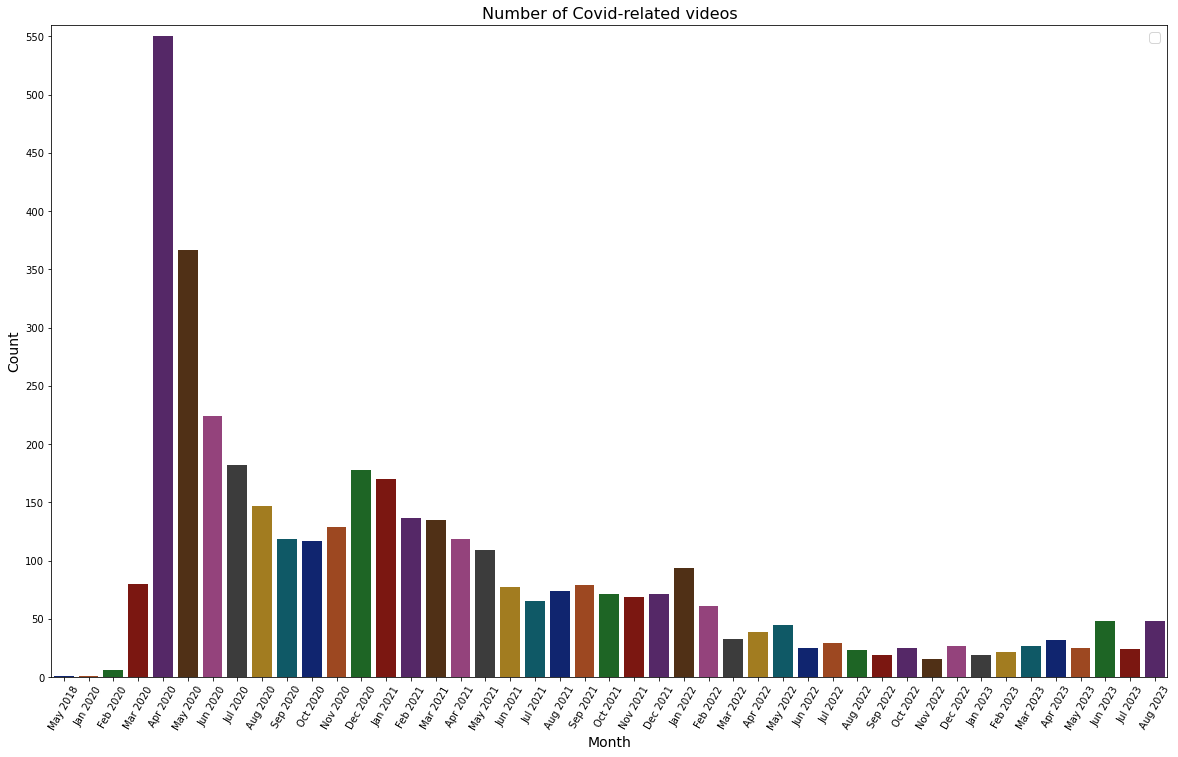

In [236]:
# Plot erstellen
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='Video-Count', data=count, palette='dark')

# Achsen- und Diagrammformatierungen
plt.legend(fontsize=14)
plt.ylim(0, 560)  # Setzt die y-Achse von 0 bis 0.04
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])  # Setzt benutzerdefinierte y-Achsen-Ticks

plt.title("Number of Covid-related videos", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
#plt.legend(title='Video_Data')

plt.show()

In [237]:
view_count = df_summary[df_summary['Video_Data'] == 'covid_view_count'].melt(id_vars=['Video_Data'], 
                                                                            var_name='Month', 
                                                                            value_name='View-Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


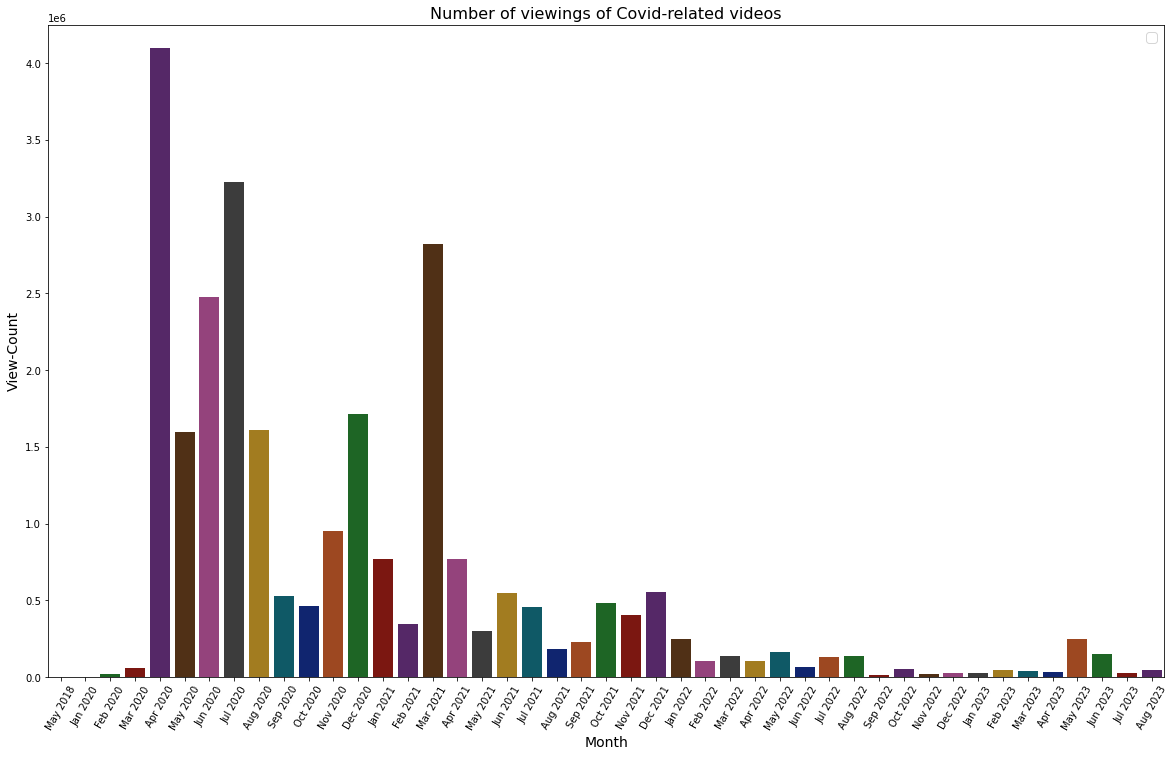

In [238]:
# Plot erstellen
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='View-Count', data=view_count, palette='dark')

# Achsen- und Diagrammformatierungen
plt.legend(fontsize=14)
plt.ylim(0, 4250000)  # Setzt die y-Achse von 0 bis 0.04
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000])  # Setzt benutzerdefinierte y-Achsen-Ticks

plt.title("Number of viewings of Covid-related videos", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("View-Count", fontsize=14)
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
#plt.legend(title='Video_Data')

plt.show()

In [239]:
like_ratio = df_summary[df_summary['Video_Data'] == 'covid_view_like_ratio'].melt(id_vars=['Video_Data'], 
                                                                            var_name='Month', 
                                                                            value_name='View-Like-Ratio')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


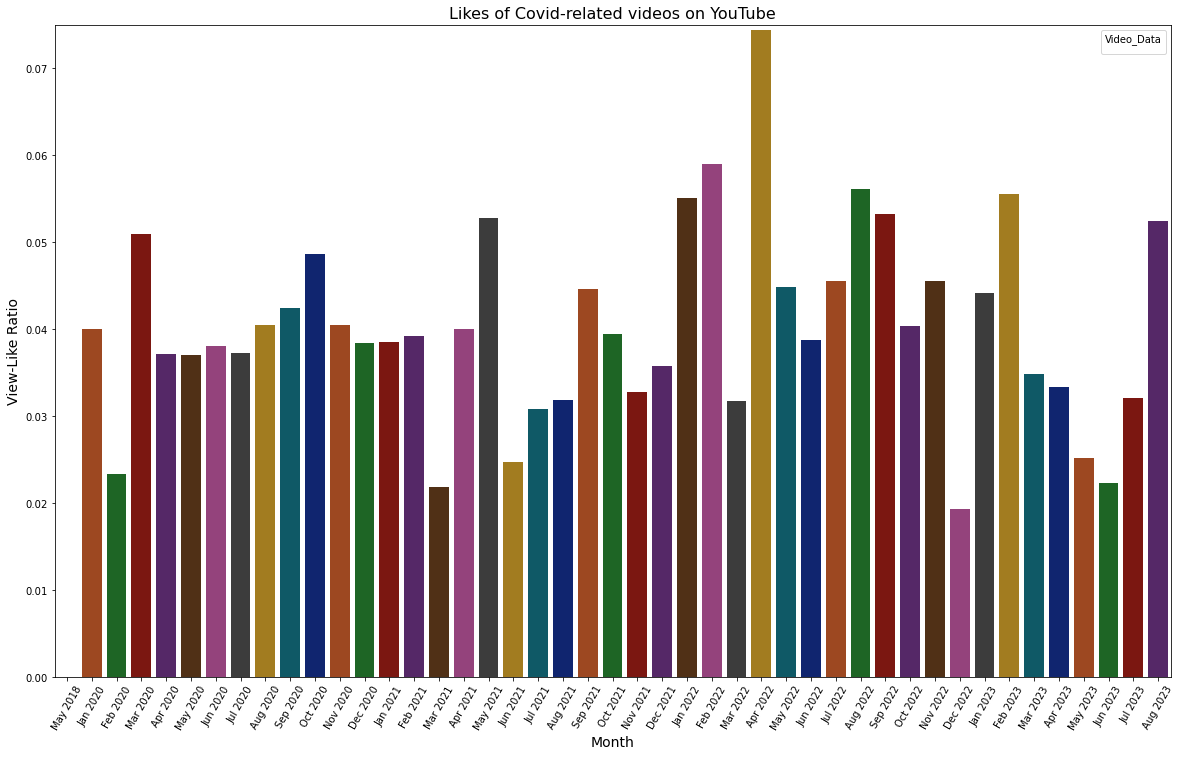

In [240]:
# Plot erstellen
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='View-Like-Ratio', data=like_ratio, palette='dark')

# Achsen- und Diagrammformatierungen
plt.legend(fontsize=14)
plt.ylim(0, 0.075)  # Setzt die y-Achse von 0 bis 0.04
plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07])  # Setzt benutzerdefinierte y-Achsen-Ticks

plt.title("Likes of Covid-related videos on YouTube", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("View-Like Ratio", fontsize=14)
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
plt.legend(title='Video_Data')

plt.show()

In [241]:
###########################################   Summary_all_healthrelated   ######################################################


In [242]:
path = 'C:/Users/Rike/Documents/git/pd_summary_health.xlsx'
df_summary = pd.read_excel(path)
df_summary

,year_month,2019-09,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,...,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08
0,health_title,1,0,0,0,14.0000,9.0000,9.0000,8.0000,7.0000,...,117.0000,116.0000,189.0000,252.0000,350.0000,427.0000,526.0000,467.0000,271.0000,277.0000
1,health_view_count,753,0,0,0,266703.0000,1929.0000,6154.0000,11562.0000,12169.0000,...,14547308.0000,5621685.0000,2050367.0000,478848.0000,6328874.0000,5899556.0000,30788036.0000,17128134.0000,6242488.0000,11982383.0000
2,health_view_like_ratio,0,0,0,0,0.0150,0.0200,0.0211,0.0138,0.0057,...,0.0369,0.0306,0.0327,0.0337,0.0324,0.0336,0.0298,0.0477,0.0401,0.0463
3,health_comment_count,0,0,0,0,1389.0000,0.0000,3.0000,33.0000,80.0000,...,10367.0000,3956.0000,3939.0000,1973.0000,3582.0000,5007.0000,15807.0000,9634.0000,6527.0000,11768.0000


In [243]:
df_summary.columns = ['Video_Data'] + [pd.to_datetime(col) if not isinstance(col, pd.Timestamp) else col for col in df_summary.columns[1:]]
df_summary.columns = ['Video_Data'] + [col.strftime('%m/%Y') if isinstance(col, pd.Timestamp) else col for col in df_summary.columns[1:]]
df_summary

,Video_Data,09/2019,01/2020,02/2020,03/2020,04/2020,05/2020,06/2020,07/2020,08/2020,...,11/2022,12/2022,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023,08/2023
0,health_title,1,0,0,0,14.0000,9.0000,9.0000,8.0000,7.0000,...,117.0000,116.0000,189.0000,252.0000,350.0000,427.0000,526.0000,467.0000,271.0000,277.0000
1,health_view_count,753,0,0,0,266703.0000,1929.0000,6154.0000,11562.0000,12169.0000,...,14547308.0000,5621685.0000,2050367.0000,478848.0000,6328874.0000,5899556.0000,30788036.0000,17128134.0000,6242488.0000,11982383.0000
2,health_view_like_ratio,0,0,0,0,0.0150,0.0200,0.0211,0.0138,0.0057,...,0.0369,0.0306,0.0327,0.0337,0.0324,0.0336,0.0298,0.0477,0.0401,0.0463
3,health_comment_count,0,0,0,0,1389.0000,0.0000,3.0000,33.0000,80.0000,...,10367.0000,3956.0000,3939.0000,1973.0000,3582.0000,5007.0000,15807.0000,9634.0000,6527.0000,11768.0000


In [244]:
new_columns1 = []

# Iteriere über die Spaltennamen ab der zweiten Spalte
for col in df_summary.columns[1:]:
    month, year = col.split('/')  # Spaltennamen aufteilen
    month_name = month_dict[str(int(month))]  # Monat durch Abkürzung ersetzen
    new_columns1.append(f"{month_name} {year}")  # Neuer Spaltenname z.B. 'Jan 2018'

# Setzen der neuen Spaltennamen inkl. 'Country/Region'
df_summary.columns = ['Video_Data'] + new_columns1

In [245]:
df_summary.iloc[:, 1:] = df_summary.iloc[:, 1:].round(4)

# Umwandeln der ersten Zeile in int, falls der Wert eine ganze Zahl darstellt
df_summary.iloc[0, 1:] = df_summary.iloc[0, 1:].apply(lambda x: int(x) if isinstance(x, (float, int)) and x % 1 == 0 else x)

# Anpassen der Anzeigeoptionen, um wissenschaftliche Notation zu verhindern
pd.options.display.float_format = '{:.4f}'.format
df_summary

,Video_Data,Sep 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,...,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023
0,health_title,1,0,0,0,14.0000,9.0000,9.0000,8.0000,7.0000,...,117.0000,116.0000,189.0000,252.0000,350.0000,427.0000,526.0000,467.0000,271.0000,277.0000
1,health_view_count,753,0,0,0,266703.0000,1929.0000,6154.0000,11562.0000,12169.0000,...,14547308.0000,5621685.0000,2050367.0000,478848.0000,6328874.0000,5899556.0000,30788036.0000,17128134.0000,6242488.0000,11982383.0000
2,health_view_like_ratio,0,0,0,0,0.0150,0.0200,0.0211,0.0138,0.0057,...,0.0369,0.0306,0.0327,0.0337,0.0324,0.0336,0.0298,0.0477,0.0401,0.0463
3,health_comment_count,0,0,0,0,1389.0000,0.0000,3.0000,33.0000,80.0000,...,10367.0000,3956.0000,3939.0000,1973.0000,3582.0000,5007.0000,15807.0000,9634.0000,6527.0000,11768.0000


In [246]:
like_ratio = df_summary[df_summary['Video_Data'] == 'health_view_like_ratio'].melt(id_vars=['Video_Data'], 
                                                                            var_name='Month', 
                                                                            value_name='View-Like-Ratio')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


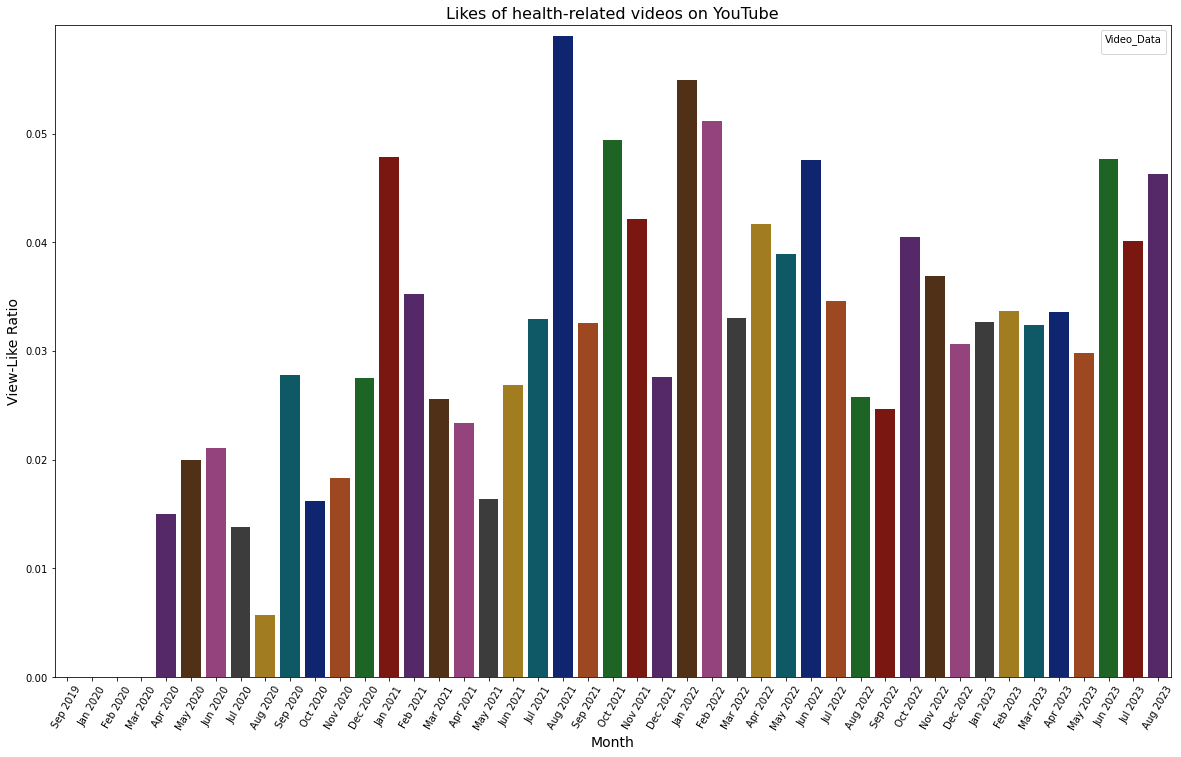

In [247]:
# Plot erstellen
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='View-Like-Ratio', data=like_ratio, palette='dark')

# Achsen- und Diagrammformatierungen
plt.legend(fontsize=14)
plt.ylim(0, 0.06)  # Setzt die y-Achse von 0 bis 0.06
plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05])  # Setzt benutzerdefinierte y-Achsen-Ticks

plt.title("Likes of health-related videos on YouTube", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("View-Like Ratio", fontsize=14)
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
plt.legend(title='Video_Data')

plt.show()

In [248]:
like_ratio = df_summary[df_summary['Video_Data'] == 'health_title'].melt(id_vars=['Video_Data'], 
                                                                            var_name='Month', 
                                                                            value_name='Video-Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


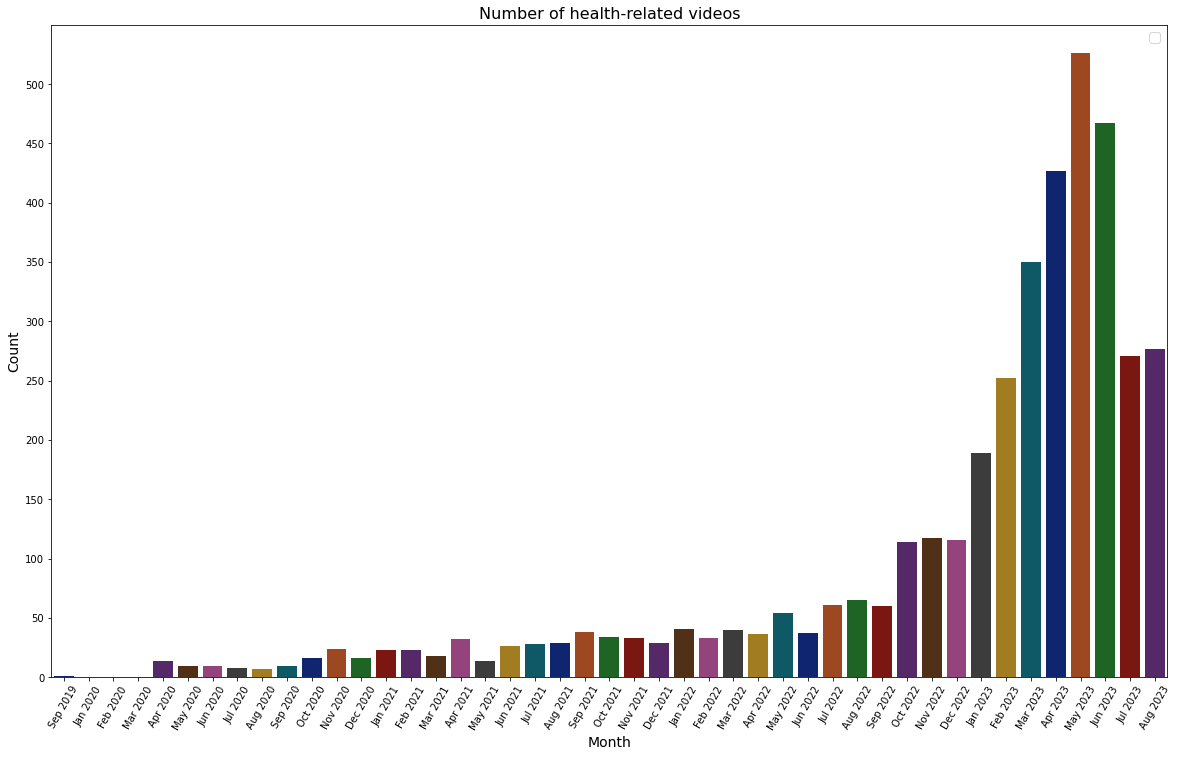

In [249]:
# Plot erstellen
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='Video-Count', data=like_ratio, palette='dark')

# Achsen- und Diagrammformatierungen
plt.legend(fontsize=14)
plt.ylim(0, 550)  # Setzt die y-Achse von 0 bis 0.04
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])  # Setzt benutzerdefinierte y-Achsen-Ticks

plt.title("Number of health-related videos", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
#plt.legend(title='Video_Data')

plt.show()

In [250]:
view_count = df_summary[df_summary['Video_Data'] == 'health_view_count'].melt(id_vars=['Video_Data'], 
                                                                            var_name='Month', 
                                                                            value_name='View-Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


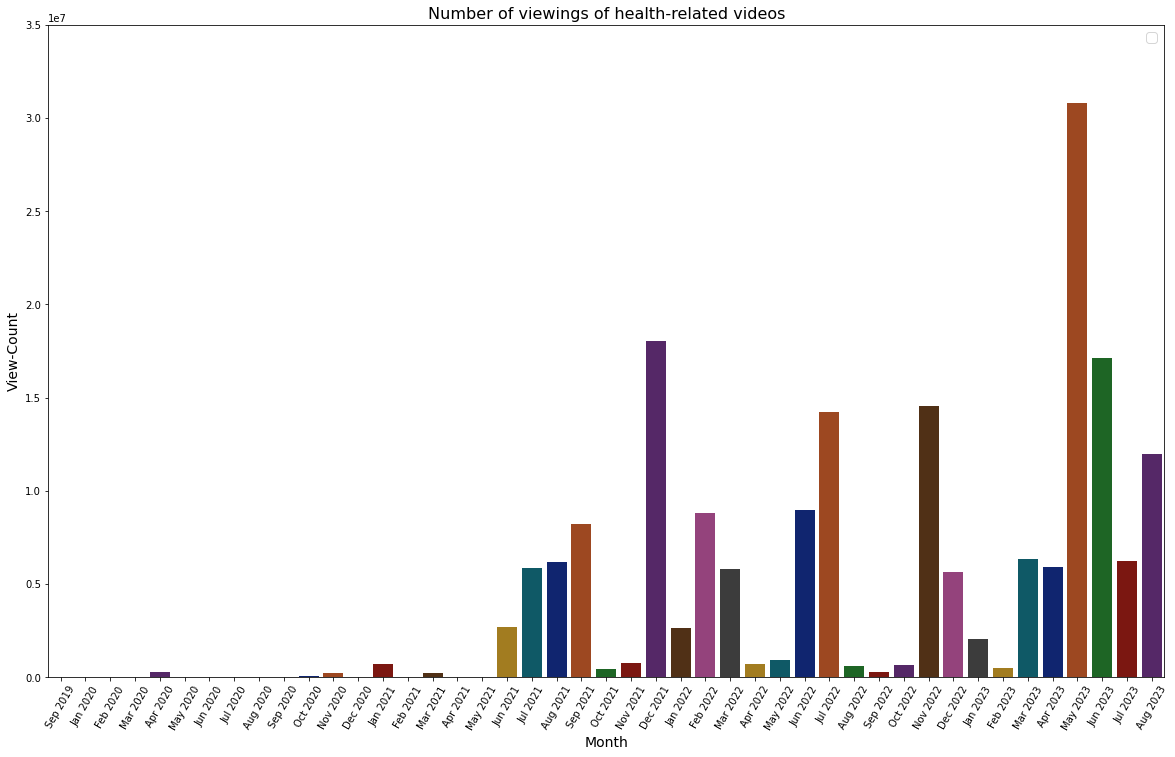

In [251]:
# Plot erstellen
plt.figure(figsize=(20, 12))
sns.barplot(x='Month', y='View-Count', data=view_count, palette='dark')

# Achsen- und Diagrammformatierungen
plt.legend(fontsize=14)
plt.ylim(0, 31000000)  # Setzt die y-Achse von 0 bis 0.04
plt.yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000])  # Setzt benutzerdefinierte y-Achsen-Ticks

plt.title("Number of viewings of health-related videos", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("View-Count", fontsize=14)
plt.xticks(rotation=60)  # Für bessere Lesbarkeit
#plt.legend(title='Video_Data')

plt.show()